# Лабораторная работа №4. <br> Сопоставление особых точек изображений, распознавание изображений в библиотеке OpenCV.

In [53]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from time import time
img = cv.imread('chess.jpg', cv.IMREAD_GRAYSCALE)
(h,w) = img.shape[:2]
center = (int(w/2), int(h/2))
rotation_matrix = cv.getRotationMatrix2D(center, 90, 1)
rotated_img = cv.warpAffine(img,rotation_matrix,(w,h))
img_blur_7g = cv.GaussianBlur(img, (7,7), 0)
res_img = cv.resize(img, (500, 400), interpolation=cv.INTER_NEAREST)
cv.imwrite('chess_blured.jpg', img_blur_7g)
cv.imwrite('chess_rotated.jpg',rotated_img)
cv.imwrite('chess_resized.jpg',res_img)

True

## 1. Дескриптор ORB

### Сопоставление размытого изображения с оригиналом

Время выполнения дескриптора: 0.011 секунд


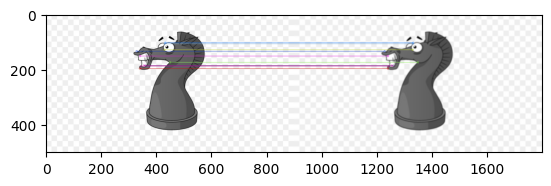

In [54]:
img1 = cv.imread('chess.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('chess_blured.jpg', cv.IMREAD_GRAYSCALE)
start_time = time()
orb = cv.ORB.create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
print(f'Время выполнения дескриптора: {time() - start_time:.3f} секунд')
matches = sorted(matches, key=lambda x: x.distance)
img3 = cv.drawMatches(img1,kp1,img2, kp2, matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

### Сопоставление  изображения с другим размером с оригиналом

Время выполнения дескриптора: 0.009 секунд


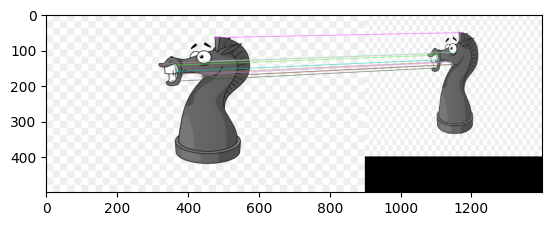

In [55]:
img1 = cv.imread('chess.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('chess_resized.jpg', cv.IMREAD_GRAYSCALE)

start_time = time()
orb = cv.ORB.create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
print(f'Время выполнения дескриптора: {time() - start_time:.3f} секунд')
matches = sorted(matches, key=lambda x: x.distance)
img3 = cv.drawMatches(img1,kp1,img2, kp2, matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

### Сопоставление перевернутого изображения с оригиналом

Время выполнения дескриптора: 0.011 секунд


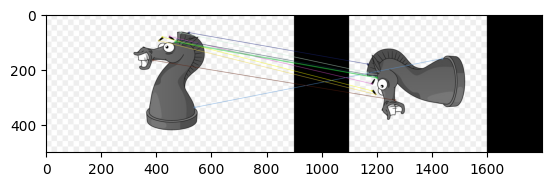

In [56]:
img1 = cv.imread('chess.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('chess_rotated.jpg', cv.IMREAD_GRAYSCALE)

start_time = time()
orb = cv.ORB.create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
print(f'Время выполнения дескриптора: {time() - start_time:.3f} секунд')
matches = sorted(matches, key=lambda x: x.distance)
img3 = cv.drawMatches(img1,kp1,img2, kp2, matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

## 2. Дескриптор SIFT

### Сопоставление размытого изображения с оригиналом

Время выполнения дескриптора: 0.160 секунд


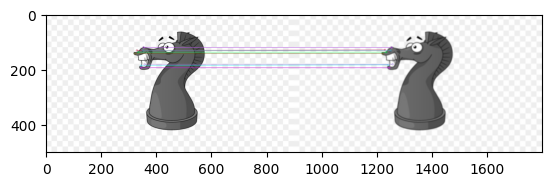

In [57]:
img1 = cv.imread('chess.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('chess_blured.jpg', cv.IMREAD_GRAYSCALE)

start_time = time()
sift = cv.SIFT.create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
print(f'Время выполнения дескриптора: {time() - start_time:.3f} секунд')
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])
img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, good[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

### Сопоставление  изображения с другим размером с оригиналом

Время выполнения дескриптора: 0.100 секунд


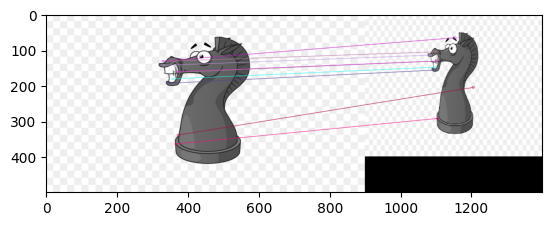

In [58]:
img1 = cv.imread('chess.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('chess_resized.jpg', cv.IMREAD_GRAYSCALE)

start_time = time()
sift = cv.SIFT.create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
print(f'Время выполнения дескриптора: {time() - start_time:.3f} секунд')
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])
img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, good[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

### Сопоставление перевернутого изображения с оригиналом

Время выполнения дескриптора: 0.121 секунд


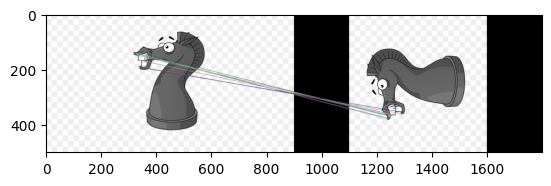

In [59]:
img1 = cv.imread('chess.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('chess_rotated.jpg', cv.IMREAD_GRAYSCALE)

start_time = time()
sift = cv.SIFT.create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
print(f'Время выполнения дескриптора: {time() - start_time:.3f} секунд')
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])
img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, good[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

## Контрольные вопросы
1. **Какой из дескрипторов справился быстрее с обнаружением объекта лучше?**\
    ORB ???
2. **Какой из дескрипторов справился быстрее?**\
    По результатам выполнения программы, дескриптор ORB справился быстрее.